In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## KMEANS CLUSTERING

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("/kaggle/input/income-dataset-for-kmeans-clustering/income.csv")
df.shape

(22, 3)

In [4]:
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


Text(0, 0.5, 'Income($)')

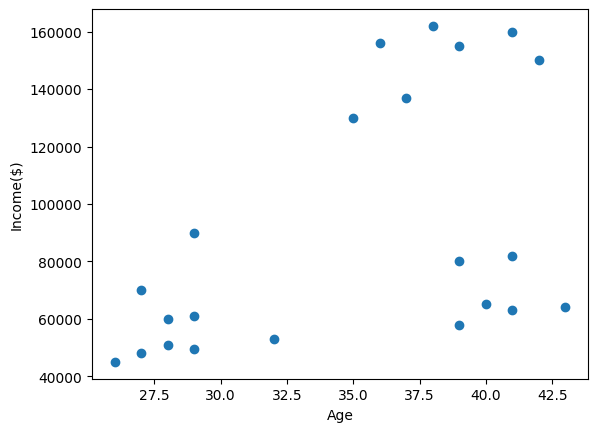

In [6]:
plt.scatter(df.Age,df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')

# by just seeing the scatter plot you can see how many clusters k we can make

In [8]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters = 3)
y_pred = km.fit_predict(df[['Age', 'Income($)']])

y_pred

array([2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1],
      dtype=int32)

In [9]:
df['cluster'] = y_pred
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,1
3,Ismail,28,60000,1
4,Kory,42,150000,0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


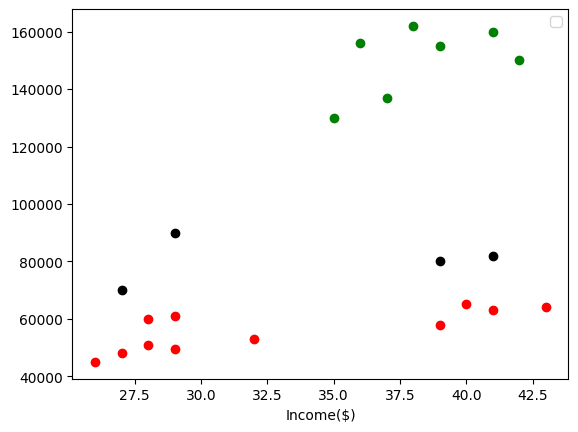

In [12]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

plt.scatter(df1.Age, df1['Income($)'], color = 'green')
plt.scatter(df2.Age, df2['Income($)'], color = 'red')
plt.scatter(df3.Age, df3['Income($)'], color = 'black')

plt.xlabel("Age")
plt.xlabel("Income($)")
plt.legend()

# As you can see the data are not scaled correctly and they are causing the issue in fitting the model

In [17]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df['Income($)'] = scaler.fit_transform(df[['Income($)']])

df['Income($)']

# this is the scaled values

0     0.213675
1     0.384615
2     0.136752
3     0.128205
4     0.897436
5     0.940171
6     0.982906
7     1.000000
8     0.948718
9     0.726496
10    0.786325
11    0.000000
12    0.025641
13    0.051282
14    0.038462
15    0.068376
16    0.170940
17    0.153846
18    0.162393
19    0.299145
20    0.316239
21    0.111111
Name: Income($), dtype: float64

In [18]:
df['Age'] = scaler.fit_transform(df[['Age']])

df['Age']

0     0.058824
1     0.176471
2     0.176471
3     0.117647
4     0.941176
5     0.764706
6     0.882353
7     0.705882
8     0.588235
9     0.529412
10    0.647059
11    0.000000
12    0.058824
13    0.117647
14    0.176471
15    0.352941
16    0.823529
17    0.882353
18    1.000000
19    0.764706
20    0.882353
21    0.764706
Name: Age, dtype: float64

In [21]:
model = KMeans(n_clusters = 3)
y_pred = model.fit_predict(df[['Age', 'Income($)']])
df['cluster'] = y_pred

df['cluster']

0     1
1     1
2     1
3     1
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    1
12    1
13    1
14    1
15    1
16    2
17    2
18    2
19    2
20    2
21    2
Name: cluster, dtype: int32

In [22]:
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


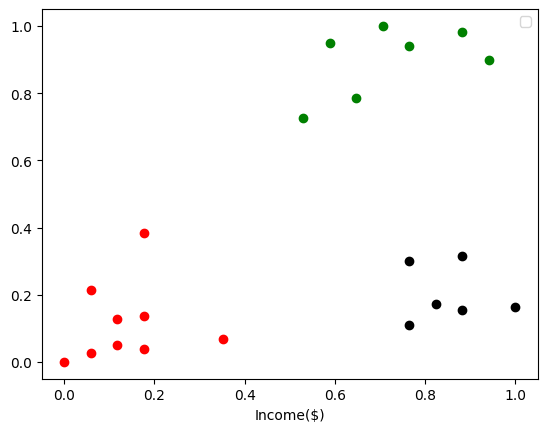

In [24]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

plt.scatter(df1.Age, df1['Income($)'], color = 'green')
plt.scatter(df2.Age, df2['Income($)'], color = 'red')
plt.scatter(df3.Age, df3['Income($)'], color = 'black')

plt.xlabel("Age")
plt.xlabel("Income($)")
plt.legend()

# As you can see now, the plot is looking pretty good

In [26]:
model.cluster_centers_

# Lets plot it on scatter plot

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

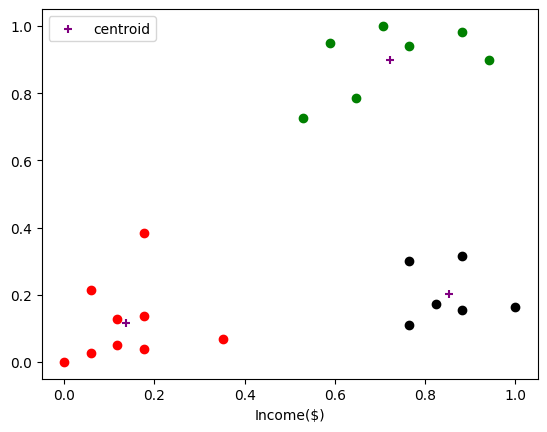

In [31]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

plt.scatter(df1.Age, df1['Income($)'], color = 'green')
plt.scatter(df2.Age, df2['Income($)'], color = 'red')
plt.scatter(df3.Age, df3['Income($)'], color = 'black')
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], color = 'purple', marker = '+', label = 'centroid')

plt.xlabel("Age")
plt.xlabel("Income($)")
plt.legend()


# now we have the cluster point also in the plot

 ## ELBOW PLOT METHOD TO FIND OUT HOW MANY CENTROIDS TO PLOT

In [34]:
k_rage = range(1, 10)
sse = []

for k in k_range:
    model = KMeans(n_clusters = k)
    model.fit(df[['Age', 'Income($)']])

    sse.append(model.inertia_)

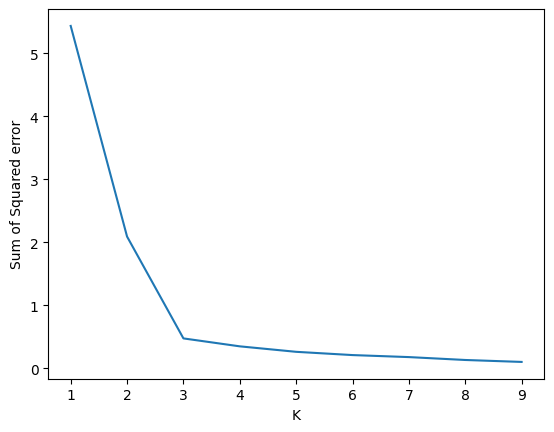

In [39]:
plt.xlabel('K')
plt.ylabel('Sum of Squared error')

plt.plot(k_range, sse)

# as you can see we got three cluster